In [ ]:
%pip install qiskit pylatexenc matplotlib

In [1]:
# Инициализация
import matplotlib.pyplot as plt
%matplotlib inline

# Импорт библиотеки для квантовых вычилений Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# Импорт построения гистограмм
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

In [2]:
simulator = Aer.get_backend('statevector_simulator')
qasm_simulator = BasicAer.get_backend('qasm_simulator')

# Начальное состояние

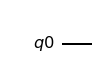

In [3]:
# Let's do an X-gate on a |0> qubit
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

qc.draw(output='mpl')

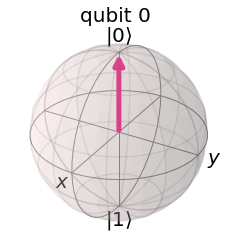

In [4]:
result = execute(qc, simulator).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

# Основные квантовые вентили 

# X-вентиль
X-вентиль действует как вращение вокруг оси X сферы Блоха на $ \pi $ радиан.
X-вентиль отображает $ | 0 \rangle $ в $ | 1 \rangle $ и $ | 1 \rangle $ в $ | 0 \rangle $. 

Это квантовый эквивалент логического элемента НЕ для классических компьютеров. 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

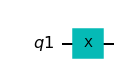

In [5]:
# Let's do an X-gate on a |0> qubit
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

qc.x(qr[0])

qc.draw(output='mpl')

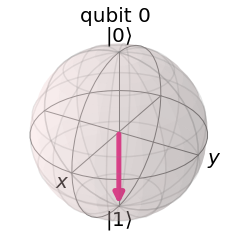

In [6]:
result = execute(qc, simulator).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### H-вентиль
Вентиль Адамара представляет собой поворот $ \pi $ вокруг оси, которая находится посередине оси $ X $ и оси $ Z $.
Он отображает базовое состояние $ | 0 \rangle $ в $ \frac{| 0 \rangle + | 1 \rangle} {\sqrt {2}} $, что означает, что измерение будет иметь равные вероятности быть "1" или «0», создавая «суперпозицию» состояний. Это состояние также записывается как $ | + \rangle $.

$H = \frac{1}{\sqrt {2}} \begin {pmatrix}
1 & 1 \\
1 & -1 \\
\end {pmatrix} $

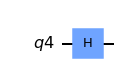

In [7]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.h(q[0])

qc.draw(output='mpl')

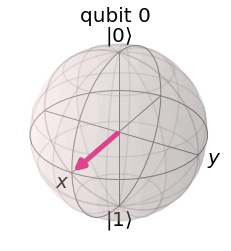

In [8]:
# Let's see the result
result = execute(qc, simulator).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

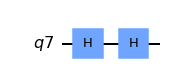

In [9]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.h(q[0])

qc.draw(output='mpl')

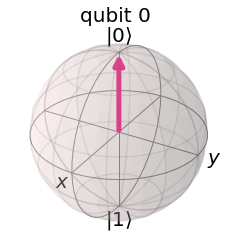

In [10]:
# Let's see the result
result = execute(qc, simulator).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Z-вентиль
Вентиль Z представляет собой поворот вокруг оси Z сферы Блоха на $ \pi $ радиан. Иногда его называют «фазовый вентиль».

$ Z = \begin {pmatrix}
1 & 0 \\
0 & -1 \\
\end {pmatrix} $

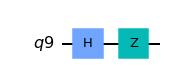

In [11]:
# Let's do an Z-gate on |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.h(q[0])
qc.z(q[0])

qc.draw(output='mpl')

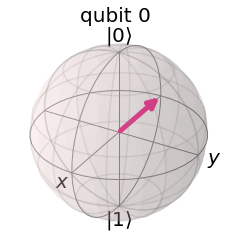

In [12]:
# Let's see the result
result = execute(qc, simulator).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### CX-вентиль (CNOT)
Управляемый вентиль NOT (или CNOT или CX) действует на два кубита. Он выполняет операцию НЕ (эквивалентную применению X-элемента) на втором кубите только тогда, когда первый кубит равен $ | 1 \rangle $, и в противном случае оставляет его без изменений. Примечание. Qiskit нумерует биты в строке справа налево.

$ CX = \begin {pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end {pmatrix} $

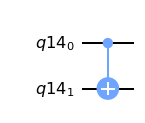

In [13]:
# Let's do an CX-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.cx(q[0],q[1])

qc.draw(output='mpl')

### Возврат фазы

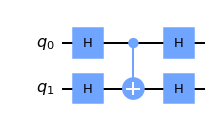

In [14]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)

qc.draw('mpl')

### CZ-вентиль
CZ-вентиль действует на два кубита, называемых «контрольным битом» и «целевым битом». Он меняет знак (эквивалентно применению Z-элемента с фазовым сдвигом) целевого кубита тогда и только тогда, когда управляющий кубит равен $ | 1 \rangle $.

$ CZ = \begin {pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end {pmatrix} $

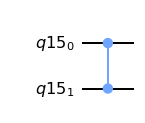

In [15]:
# Let's do an CZ-gate on |00>
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.cz(q[0],q[1])

qc.draw(output='mpl')

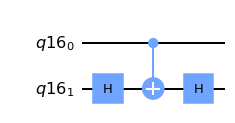

In [16]:
# Получим CZ-вентиль из CX и H
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])

qc.draw(output='mpl')

### CCX-вентиль
CCX также называют вентилем Тоффоли.
Логический элемент CCX представляет собой трехбитовый вентиль с двумя управляющими кубитами и одним управляемым в качестве входа и выхода. Если первые два бита находятся в состоянии $ | 1 \rangle $, он применяет X (или НЕ) к третьему биту. В противном случае ничего не происходит.

$ CCX = \begin {pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end {pmatrix} $

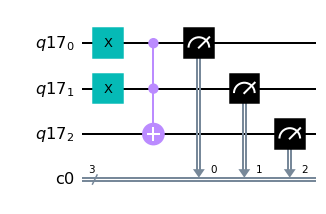

In [17]:
# Let's do an CCX-gate on |00>
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

qc.x([q[0],q[1]])
qc.mct([q[0],q[1]],q[2])

qc.measure(q,c)

qc.draw(output='mpl')

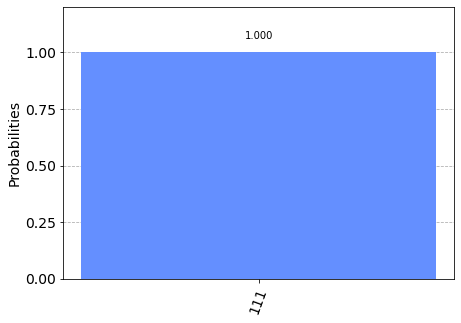

In [18]:
shots = 1024
results = execute(qc, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

### OR-вентиль

|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

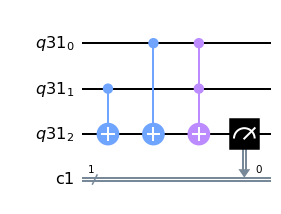

In [19]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])

qc.draw(output='mpl')

### XOR-вентиль
|A(input)|B(input)|output|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

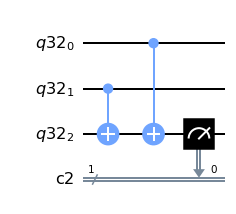

In [20]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])

qc.draw(output='mpl')

### NOR-вентиль

|A(input)|B(input)|output|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

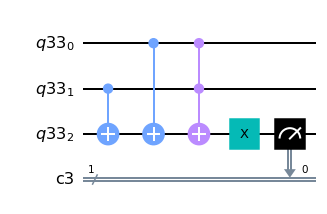

In [21]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])

qc.draw(output='mpl')

# Сумматор
Сумматор - это цифровая логическая схема, которая выполняет сложение чисел.

В этом примере мы рассмотрим простейшие сумматоры, а именно полусумматор и полный сумматор.

## Полусумматор
Полусумматор используется для сложения двух младших цифр в двоичной сумме.
Он имеет два одиночных двоичных входа, называемых A и B, и два выхода C (выполнение) и S (сумма).
Выход C будет использоваться как вход для полного сумматора, который будет объяснен позже, для получения значения в старшей цифре.

Полусумматоры можно описать с помощью приведенной ниже таблицы истинности.

| A (ввод) | B (ввод) | S (сумма) | C  |
| ----------- | ------------ | ------------ | ----------- - |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

Из таблицы истинности вы должны заметить, что выход переноса C является результатом работы логического элемента И против A и B, где выход S является результатом операции XOR против A и B.
Поскольку мы уже создали вентили AND и XOR, мы можем объединить эти вентили и создать полусумматор следующим образом.

Мы обозначаем наш квантовый регистр как 'q', классические регистры как 'c', назначаем входы A и B для q [0] и q [1], выход суммы S и переносим выход C в q [2] и q [3 ].

{'00': 1000}


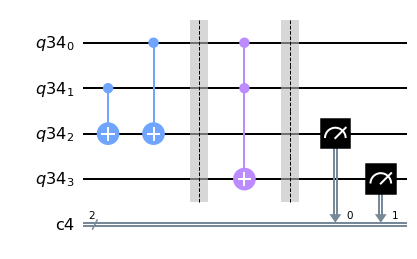

In [22]:
#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

job = execute(qc, qasm_simulator, shots=1000)
result = job.result()
count =result.get_counts()

print(count)
qc.draw(output='mpl')